In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.metrics import zero_one_loss
from sklearn.random_projection import GaussianRandomProjection
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('seaborn')

In [3]:
cd D:\STUDY\SEM-4\ML\bank\bank-additional

D:\STUDY\SEM-4\ML\bank\bank-additional


In [75]:
data = pd.read_csv('bank-additional-full.csv',sep = ';')
#data.head(5)
#data.columns

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [76]:
data.groupby('contact').size()

contact
cellular     26144
telephone    15044
dtype: int64

EDA

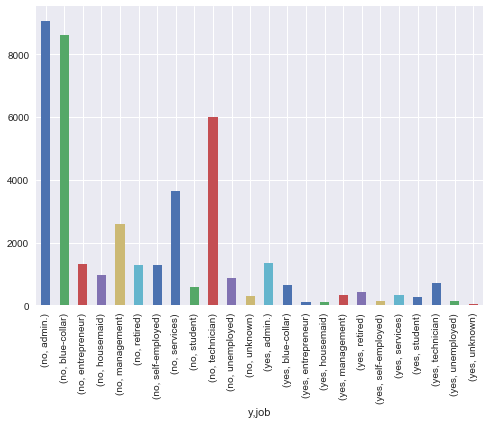

In [78]:
data.groupby(['y','job']).size().plot(kind='bar')

In [79]:
a = data.groupby('y').size()/data.groupby('y').size().sum()
a
#plt.pie(a,labels = [0,1])

y
no     0.887346
yes    0.112654
dtype: float64

OverSampling Data

In [80]:
data_y_yes = data[data['y'] == 'yes']

In [81]:
data_new = data.append(data_y_yes)

In [84]:
a = data_new.groupby('y').size()/data_new.groupby('y').size().sum()
a

y
no     0.797504
yes    0.202496
dtype: float64

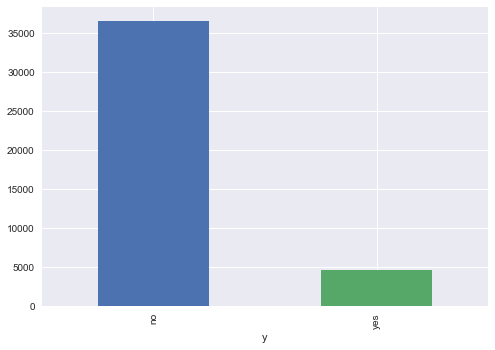

In [83]:
data.groupby('y').size().plot(kind='bar')

K Means

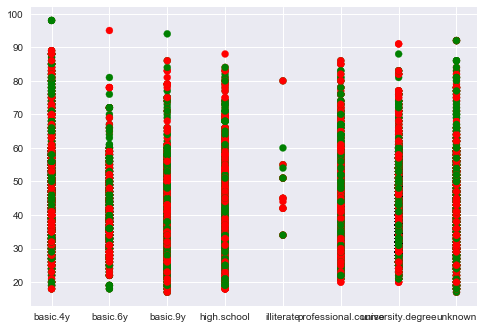

In [85]:
y_set = [0,1]
color = ['red' if l == 0 else 'green' for l in y_set]
plt.scatter(data_new['education'],data_new['age'],color =color)
plt.show()

In [254]:
xdata = data_new.iloc[:,:-1]
ydata_pca = data_new['y']

In [255]:
ydata = pd.get_dummies(ydata_pca)

In [256]:
ydata = ydata.drop('no',axis =1)

In [147]:
obj_train_df = xdata.select_dtypes(include=['object']).copy()
df_4 = pd.get_dummies(obj_train_df,obj_train_df.columns,drop_first = True)
df_5 = xdata.drop(obj_train_df.columns, axis = 1)
xdata = pd.concat([df_5,df_4],axis = 1)

In [148]:
X_train, X_test, y_train, y_test = train_test_split( xdata , ydata , test_size=0.33, random_state=42)

In [149]:
X_train.dtypes[X_train.dtypes != 'object'].index

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [150]:
import warnings
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
transform_list = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler.fit(X_train[transform_list])
warnings.filterwarnings("ignore")
X_train[transform_list]= scaler.transform(X_train[transform_list])  
X_test[transform_list]= scaler.transform(X_test[transform_list])

In [213]:
xdata_pca = pd.concat([X_train,X_test])

In [151]:
from sklearn.cluster import KMeans

In [152]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(xdata)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [153]:
y_pred = kmeans.labels_ 

In [154]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Error rate vs number of clusters KMeans Learning curve

In [156]:
from scipy.spatial.distance import cdist

In [371]:
error = []
error_train = []

# Calculating error for K values between 1 and 40
for i in range(2, 10):   
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(xdata_pca, ydata)
    error.append(np.average(np.min(cdist(xdata_pca, kmeans.cluster_centers_, 'euclidean'), axis=1)))

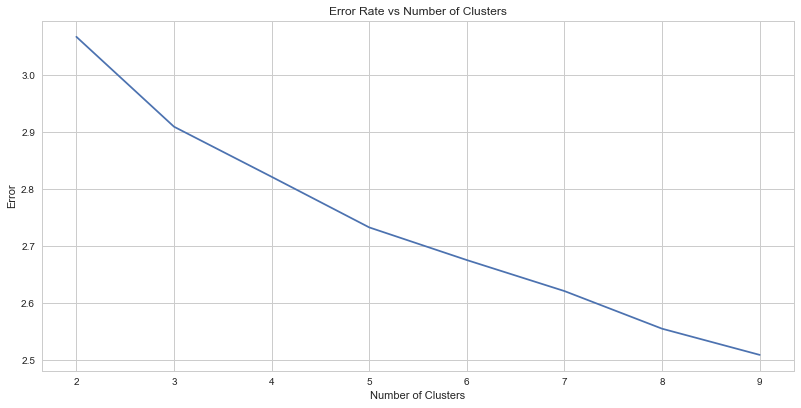

In [372]:
plt.figure(figsize=(12, 6))  
plt.plot(range(2,10), error)
plt.title('elbow curve')
plt.title('Error Rate vs Number of Clusters')  
plt.xlabel('Number of Clusters')  
plt.ylabel('Error') 
plt.show()

In [159]:
kmeans = KMeans(n_clusters = 5)

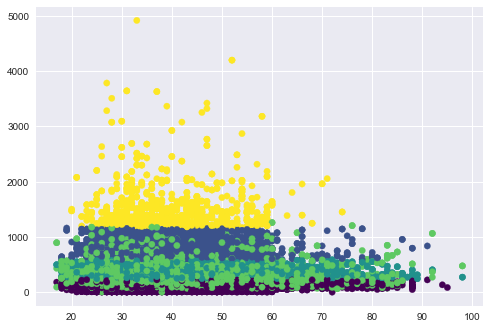

In [160]:
labels = kmeans.fit(xdata).predict(xdata)
plt.scatter(xdata.iloc[:, 0], xdata.iloc[:, 1], c=labels, s=40, cmap='viridis')
plt.show()

EM Algorithm 

In [170]:
from matplotlib import style
style.use('fivethirtyeight')
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
import sklearn.mixture as mix

In [166]:
xdata.shape

(45828, 53)

In [167]:
GMM = GaussianMixture(n_components=5).fit(xdata.iloc[:30000,:]) # Instantiate and fit the model
print('Converged:',GMM.converged_) # Check if the model has converged
means = GMM.means_ 
covariances = GMM.covariances_
# Predict
prediction = GMM.predict_proba(xdata.iloc[30000:,:])
print(prediction)

Converged: True
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  4.97310670e-22]
 [3.59329344e-11 0.00000000e+00 0.00000000e+00 1.00000000e+00
  2.61489429e-28]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]]


In [179]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [180]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[ 6.84718644e-03 -2.62875136e-02  1.02753113e-01  2.41796870e-01
  -3.26033031e-01  7.19248338e-01  4.87773386e-01  1.94725240e-01
   7.53284977e-01  6.98962338e-01  2.35727915e-01  3.72853386e-02
   3.02202052e-02  7.30751380e-02  2.81573926e-02  3.57382291e-02
   9.92212882e-02  7.21984426e-03  1.73843536e-01  2.26909391e-02
   8.50910216e-03  6.34366459e-01  2.47485947e-01  1.65025012e-03
   5.96668558e-02  1.48574081e-01  2.26084266e-01  0.00000000e+00
   1.30524470e-01  2.88432778e-01  4.20813780e-02  2.56510752e-01
   1.03140632e-04  2.39286267e-02  5.02449590e-01  2.39286267e-02
   1.52132433e-01  4.89969574e-01  1.88541076e-01  0.00000000e+00
   2.45680986e-01  1.60228972e-01  0.00000000e+00  2.71363003e-01
   1.30576040e-01  3.60992213e-03  0.00000000e+00  1.97411170e-01
   2.05095147e-01  2.00299108e-01  2.09891187e-01  9.75246248e-01
   0.00000000e+00]
 [-1.17363911e-02  4.50580019e-02 -1.76123541e-01 -4.14450907e-01
   5.58835544e-01 -1.23282458e+00 -8.36065918e-01 -3.3376

Selecting number of components in EM algorithm

In [419]:
box = []
for i in range(2,20):
    gmm = GaussianMixture(n_components=i)
    gmm = gmm.fit(xdata_pca)
    box.append(gmm.bic(xdata_pca))

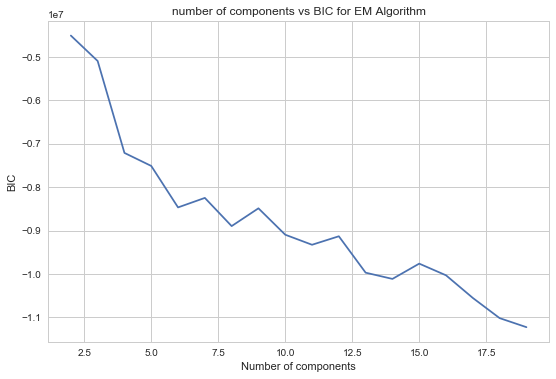

In [422]:
plt.plot(range(2,20),box)
plt.title('number of components vs BIC for EM Algorithm')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.show()

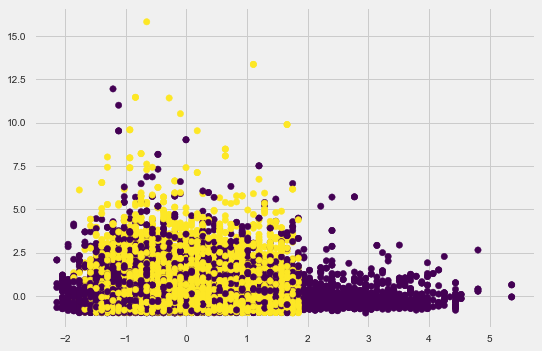

In [195]:
from sklearn.mixture import GMM
gmm = GMM(n_components=2).fit(X_train)
labels = gmm.predict(X_train)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=labels, s=40, cmap='viridis')


In [201]:
probs = gmm.predict_proba(X_train)
print(probs[:5])

[[9.43728735e-26 1.00000000e+00]
 [1.00000000e+00 1.56924818e-48]
 [6.32443581e-26 1.00000000e+00]
 [1.41603368e-12 1.00000000e+00]
 [1.00000000e+00 6.50816955e-60]]


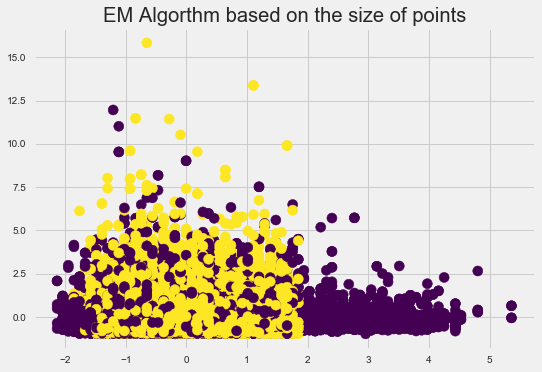

In [212]:
size =  100*probs.max(1)  # square emphasizes differences
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=labels, cmap='viridis', s=size)
plt.title('EM Algorthm based on the size of points')
plt.show()

PCA

In [395]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(xdata_pca)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [396]:
print(pca.explained_variance_)

[4.00370775 1.44159882]


In [397]:
principalDf['target'] = ydata_pca.values

In [398]:
principalDf.head(15)

,principal component 1,principal component 2,target
0,-1.652265,0.227452,no
1,1.754402,-1.764075,no
2,-1.542213,0.162079,no
3,-0.252331,-0.623404,no
4,2.157187,-0.999171,no
5,1.796334,-1.947691,no
6,1.845175,-1.951911,no
7,3.694025,0.617614,no
8,-1.572488,0.214972,no
9,2.174632,-0.831834,no


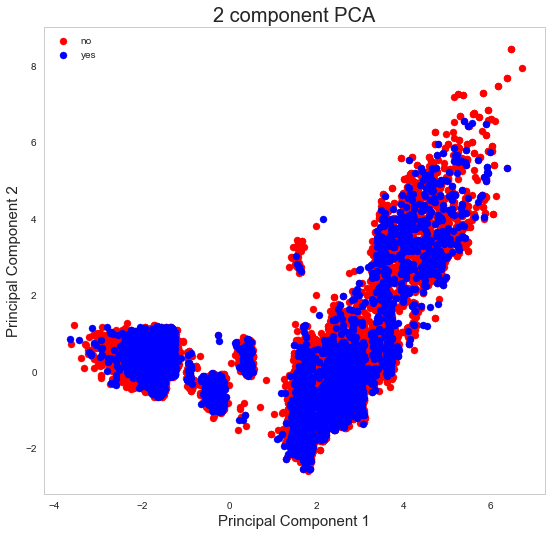

In [399]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['no','yes']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [277]:
pca = PCA(n_components=2)
pca.fit_transform(xdata_pca)
print (pca.explained_variance_ratio_)

[0.2829065 0.101865 ]


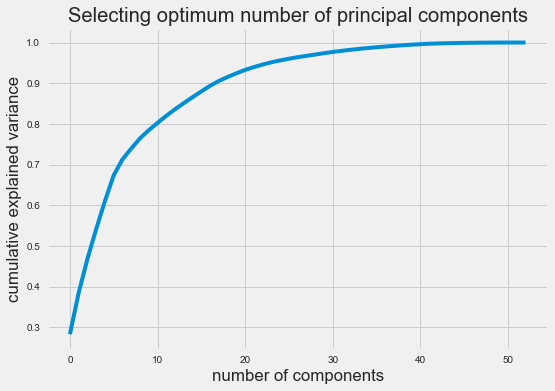

In [287]:
pca = PCA().fit(xdata_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Selecting optimum number of principal components')
plt.show()

Selecting optimum number of components in PCA

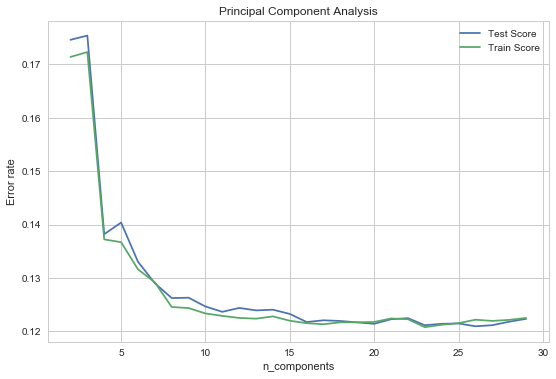

In [327]:
n_components = range(2,30,1)
error_test = []
error_train = []

for i in range(0, len(n_components)):
    pca = PCA(n_components = n_components[i], random_state=7)
    X_train_ra = pca.fit_transform(X_train)
    X_test_ra = pca.transform(X_test)

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train_ra, y_train)
    
    error_test.append(zero_one_loss(y_test, logreg.predict(X_test_ra)))
    error_train.append(zero_one_loss(y_train, logreg.predict(X_train_ra)))


sns.set(style="whitegrid")


plt.plot(n_components, error_test)
plt.plot(n_components, error_train)
plt.xlabel('n_components')
plt.ylabel('Error rate')
plt.title('Principal Component Analysis')
plt.legend(['Test Score', 'Train Score'])

In [299]:
from sklearn.metrics import zero_one_loss
from sklearn.random_projection import GaussianRandomProjection
import seaborn as sns

Selecting optimum number of components in ICA

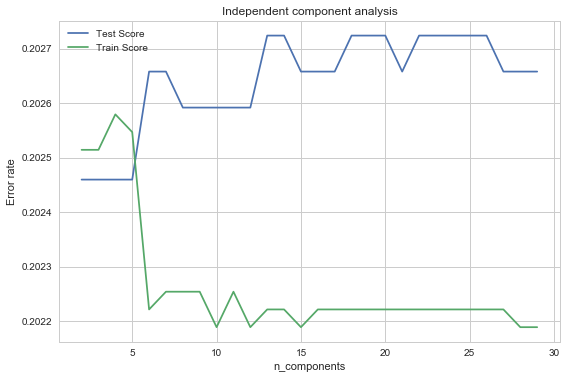

In [328]:
n_components = range(2,30,1)
error_test = []
error_train = []

for i in range(0, len(n_components)):
    ica = FastICA(n_components = n_components[i], random_state=7)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train_ica, y_train)
    
    error_test.append(zero_one_loss(y_test, logreg.predict(X_test_ica)))
    error_train.append(zero_one_loss(y_train, logreg.predict(X_train_ica)))


sns.set(style="whitegrid")


plt.plot(n_components, error_test)
plt.plot(n_components, error_train)
plt.xlabel('n_components')
plt.ylabel('Error rate')
plt.title('Independent component analysis')
plt.legend(['Test Score', 'Train Score'])

Selecting optimum number of components in RA

In [301]:
ra = GaussianRandomProjection(n_components = 8, random_state = 7)

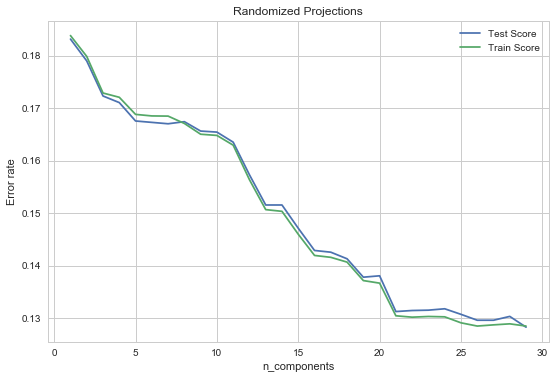

In [326]:
n_components = range(1,30,1)
error_test = []
error_train = []

for i in range(0, len(n_components)):
    ra = GaussianRandomProjection(n_components = n_components[i], random_state=7)
    X_train_ra = ra.fit_transform(X_train)
    X_test_ra = ra.transform(X_test)

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train_ra, y_train)
    
    error_test.append(zero_one_loss(y_test, logreg.predict(X_test_ra)))
    error_train.append(zero_one_loss(y_train, logreg.predict(X_train_ra)))


sns.set(style="whitegrid")


plt.plot(n_components, error_test)
plt.plot(n_components, error_train)
plt.xlabel('n_components')
plt.ylabel('Error rate')
plt.title('Randomized Projections')
plt.legend(['Test Score', 'Train Score'])

In [273]:
from sklearn.decomposition import FastICA, PCA

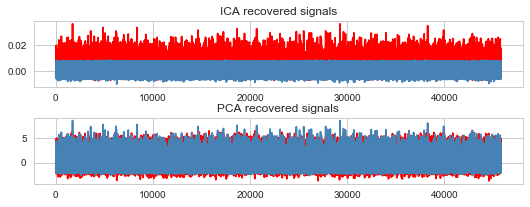

In [414]:
ica = FastICA(n_components=2)
S_ = ica.fit_transform(xdata_pca)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


# For comparison, compute PCA
pca = PCA(n_components=2)
H = pca.fit_transform(xdata_pca)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [S_, H]
names = ['ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

Clustering after PCA

In [314]:
pca = PCA(n_components=8)
pca_results = pca.fit_transform(xdata_pca)

In [315]:
kmeans = KMeans(n_clusters = 5)

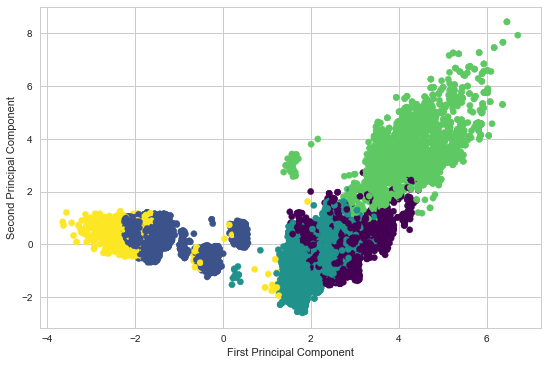

In [316]:
labels = kmeans.fit(pca_results).predict(pca_results)
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=labels, s=40, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Clustering after ICA

In [320]:
ica = FastICA(n_components=6)
ica_results = ica.fit_transform(xdata_pca)

In [321]:
kmeans = KMeans(n_clusters = 5)

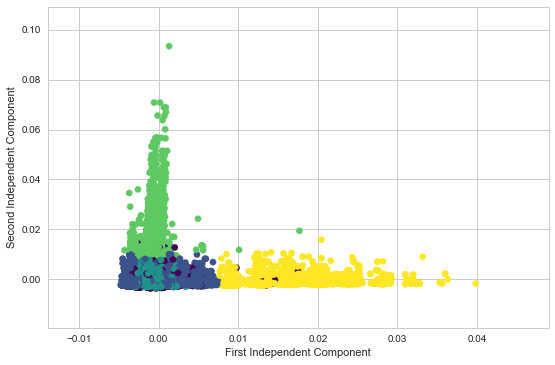

In [325]:
labels = kmeans.fit(ica_results).predict(ica_results)
plt.scatter(ica_results[:, 0], ica_results[:, 1], c=labels, s=40, cmap='viridis')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')
plt.show()

Clustering after RA

In [323]:
ra = GaussianRandomProjection(n_components = 22, random_state = 7)
ra_results = ra.fit_transform(xdata_pca)

In [330]:
kmeans = KMeans(n_clusters = 5)

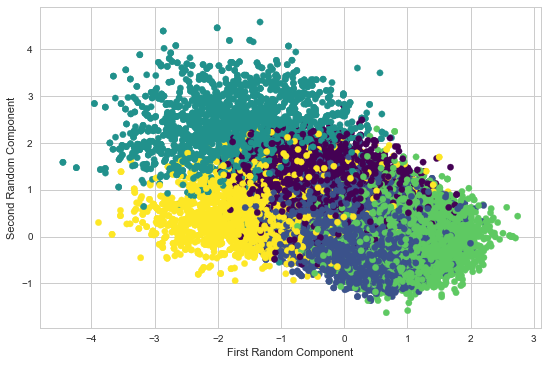

In [331]:
labels = kmeans.fit(ra_results).predict(ra_results)
plt.scatter(ra_results[:, 0], ra_results[:, 1], c=labels, s=40, cmap='viridis')
plt.xlabel('First Random Component')
plt.ylabel('Second Random Component')
plt.show()

EM after PCA

In [ ]:
pca = PCA(n_components=8)
pca_results = pca.fit_transform(xdata_pca)

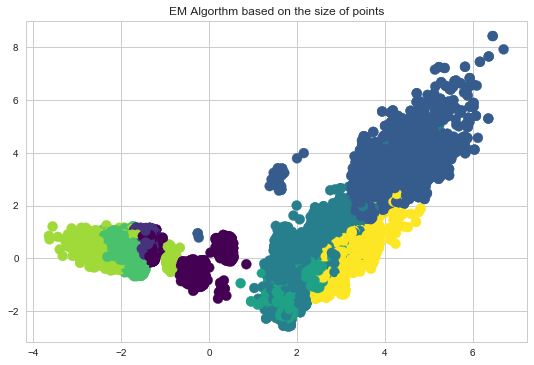

In [431]:
gmm = GaussianMixture(n_components=8).fit(pca_results)
labels = gmm.predict(pca_results)
probs = gmm.predict_proba(pca_results)
size =  100*probs.max(1)  # square emphasizes differences
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=labels, cmap='viridis', s=size)
plt.title('EM Algorthm based on the size of points')
plt.show()

EM after ICA

In [428]:
ica = FastICA(n_components=6)
ica_results = ica.fit_transform(xdata_pca)

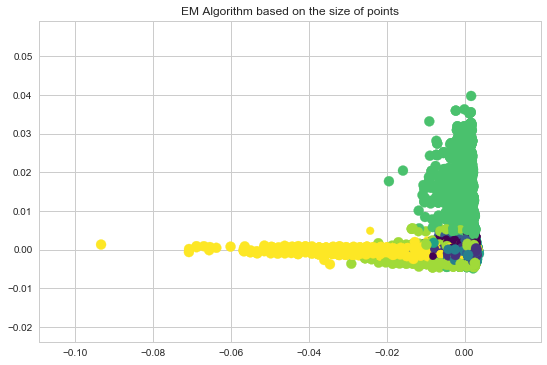

In [432]:
gmm = GaussianMixture(n_components=8).fit(ica_results)
labels = gmm.predict(ica_results)
probs = gmm.predict_proba(ica_results)
size =  100*probs.max(1)  # square emphasizes differences
plt.scatter(ica_results[:, 0], ica_results[:, 1], c=labels, cmap='viridis', s=size)
plt.title('EM Algorithm based on the size of points')
plt.show()

EM after RA

In [433]:
ra = GaussianRandomProjection(n_components = 22, random_state = 7)
ra_results = ra.fit_transform(xdata_pca)

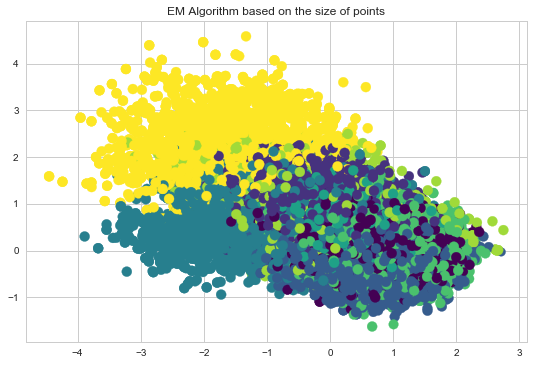

In [434]:
gmm = GaussianMixture(n_components=8).fit(ra_results)
labels = gmm.predict(ra_results)
probs = gmm.predict_proba(ra_results)
size =  100*probs.max(1)  # square emphasizes differences
plt.scatter(ra_results[:, 0], ra_results[:, 1], c=labels, cmap='viridis', s=size)
plt.title('EM Algorithm based on the size of points')
plt.xlabel('Random')
plt.ylabel('')
plt.show()

Neural Networks after PCA

In [342]:
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV

In [329]:
pca = PCA(n_components = 8, random_state=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [335]:
xdata_ann_pca = np.concatenate([X_train_pca,X_test_pca])

In [348]:
xdata_ann_pca = pd.DataFrame(xdata_ann_pca,columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])

In [333]:
a = [10,10]
b = [10,10,10]
c = [25,25,25]
d = [50,50,50]

In [360]:
set_values = [15,15,15,15,15,15]
store = np.zeros((6,2))
for i in range(len(set_values)):
    mlp = MLPClassifier(hidden_layer_sizes=set_values[:i+1],max_iter=500)
    model_ann = mlp.fit(X_train_pca,y_train)
    predictions = model_ann.predict(X_test_pca)
    predictions_train = model_ann.predict(X_train_pca)
    store[i,0] = accuracy_score(y_train, predictions_train)
    store[i,1] = accuracy_score(y_test, predictions)


Text(0.5,1,'Accuracy vs number of hidden layers')

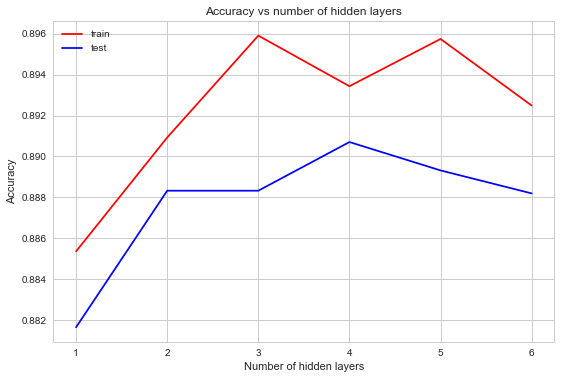

In [362]:
plt.plot(range(1,7),store[:,0], c = 'r')
plt.plot(range(1,7),store[:,1], c = 'b')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy vs number of hidden layers')

Neural Networks with Original Data

In [43]:
from sklearn.metrics import accuracy_score

In [363]:
set_values = [15,15,15,15,15,15]
store = np.zeros((6,2))
for i in range(len(set_values)):
    mlp = MLPClassifier(hidden_layer_sizes=set_values[:i+1],max_iter=500)
    model_ann = mlp.fit(X_train,y_train)
    predictions = model_ann.predict(X_test)
    predictions_train = model_ann.predict(X_train)
    store[i,0] = accuracy_score(y_train, predictions_train)
    store[i,1] = accuracy_score(y_test, predictions)


Text(0.5,1,'Accuracy vs number of hidden layers')

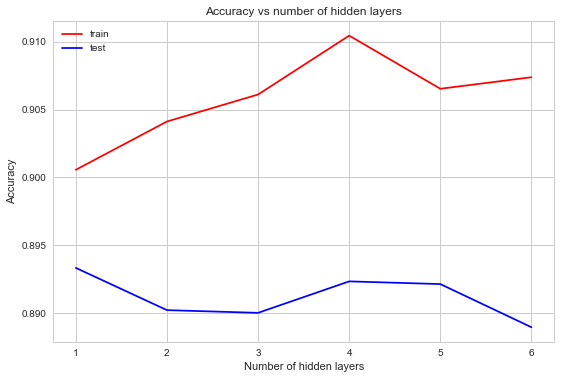

In [364]:
plt.plot(range(1,7),store[:,0], c = 'r')
plt.plot(range(1,7),store[:,1], c = 'b')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy vs number of hidden layers')

 Neural Networks after Clustering

In [378]:
kmeans_train = KMeans(n_clusters=5, random_state=0).fit(X_train)
kmeans_test = KMeans(n_clusters=5, random_state=0).fit(X_test)

In [379]:
feature_train = kmeans_train.labels_ 
feature_test = kmeans_test.labels_ 


In [385]:
feature_train = feature_train.reshape(-1,1)
feature_test = feature_test.reshape(-1,1)

In [393]:
set_values = [10,5,3,2]
store = np.zeros((4,2))
for i in range(len(set_values)):
    mlp = MLPClassifier(hidden_layer_sizes=set_values[:i+1])
    model_ann = mlp.fit(feature_train,y_train)
    predictions = model_ann.predict(feature_test)
    predictions_train = model_ann.predict(feature_train)
    store[i,0] = accuracy_score(y_train, predictions_train)
    store[i,1] = accuracy_score(y_test, predictions)

Text(0.5,1,'Accuracy vs number of hidden layers')

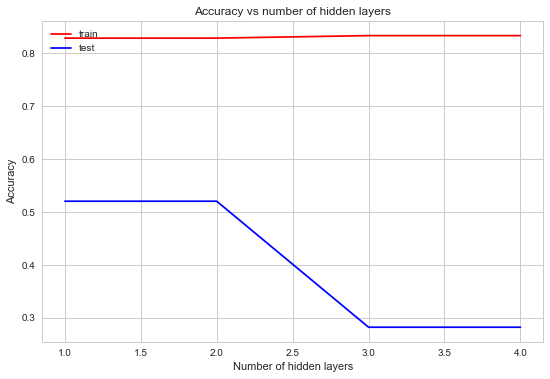

In [394]:
plt.plot(range(1,5),store[:,0], c = 'r')
plt.plot(range(1,5),store[:,1], c = 'b')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy vs number of hidden layers')

Neural networks after EM

In [438]:
em_train = GaussianMixture(n_components=8).fit(X_train)
em_test = GaussianMixture(n_components=8).fit(X_test)

In [440]:
feature_em_train =em_train.predict(X_train)
feature_em_test = em_test.predict(X_test) 


In [441]:
feature_em_train = feature_em_train.reshape(-1,1)
feature_em_test = feature_em_test.reshape(-1,1)

In [449]:
set_values = [7,10,5,2]
store = np.zeros((4,2))
for i in range(len(set_values)):
    mlp = MLPClassifier(hidden_layer_sizes=set_values[:i+1])
    model_ann = mlp.fit(feature_em_train,y_train)
    predictions = model_ann.predict(feature_em_test)
    predictions_train = model_ann.predict(feature_em_train)
    store[i,0] = accuracy_score(y_train, predictions_train)
    store[i,1] = accuracy_score(y_test, predictions)

Text(0.5,1,'Accuracy vs number of hidden layers')

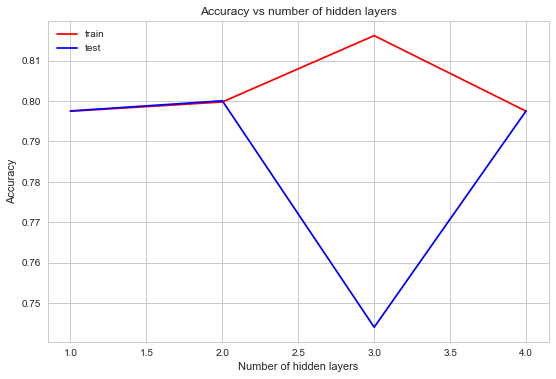

In [450]:
plt.plot(range(1,5),store[:,0], c = 'r')
plt.plot(range(1,5),store[:,1], c = 'b')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy vs number of hidden layers')